<h1>Identificador automático de idioma</h1>
<p><b>Problema</b>: Dados um texto de entrada, é possível identificar em qual língua o texto está escrito?</p>
<p>
Entrada: "texto qualquer" <br />
Saída: português ou inglês ou francês ou italiano ou...
</p>
<p>&nbsp;</p>

<h2>O processo de Reconhecimento de Padrões</h2>
<p>O objetivo desse trabalho é demonstrar o processo de "construção de atributos" e como ele é fundamental para o <b>Reconhecimento de Padrões (RP)</b>.</p>

<p>Primeiro um conjunto de "amostras" previamente conhecido (classificado)</p>

In [1]:
#
# amostras de texto em diferentes línguas
#
ingles = [
"Hello, how are you?",
"I love to read books.",
"The weather is nice today.",
"Where is the nearest restaurant?",
"What time is it?",
"I enjoy playing soccer.",
"Can you help me with this?",
"I'm going to the movies tonight.",
"This is a beautiful place.",
"I like listening to music.",
"Do you speak English?",
"What is your favorite color?",
"I'm learning to play the guitar.",
"Have a great day!",
"I need to buy some groceries.",
"Let's go for a walk.",
"How was your weekend?",
"I'm excited for the concert.",
"Could you pass me the salt, please?",
"I have a meeting at 2 PM.",
"I'm planning a vacation.",
"She sings beautifully.",
"The cat is sleeping.",
"I want to learn French.",
"I enjoy going to the beach.",
"Where can I find a taxi?",
"I'm sorry for the inconvenience.",
"I'm studying for my exams.",
"I like to cook dinner at home.",
"Do you have any recommendations for restaurants?",
]

espanhol = [
"Hola, ¿cómo estás?",
"Me encanta leer libros.",
"El clima está agradable hoy.",
"¿Dónde está el restaurante más cercano?",
"¿Qué hora es?",
"Voy al parque todos los días.",
"¿Puedes ayudarme con esto?",
"Me gustaría ir de vacaciones.",
"Este es mi libro favorito.",
"Me gusta bailar salsa.",
"¿Hablas español?",
"¿Cuál es tu comida favorita?",
"Estoy aprendiendo a tocar el piano.",
"¡Que tengas un buen día!",
"Necesito comprar algunas frutas.",
"Vamos a dar un paseo.",
"¿Cómo estuvo tu fin de semana?",
"Estoy emocionado por el concierto.",
"¿Me pasas la sal, por favor?",
"Tengo una reunión a las 2 PM.",
"Estoy planeando unas vacaciones.",
"Ella canta hermosamente.",
"El perro está jugando.",
"Quiero aprender italiano.",
"Disfruto ir a la playa.",
"¿Dónde puedo encontrar un taxi?",
"Lamento las molestias.",
"Estoy estudiando para mis exámenes.",
"Me gusta cocinar la cena en casa.",
"¿Tienes alguna recomendación de restaurantes?",
]

portugues = [
"Estou indo para o trabalho agora.",
"Adoro passar tempo com minha família.",
"Preciso comprar leite e pão.",
"Vamos ao cinema no sábado.",
"Gosto de praticar esportes ao ar livre.",
"O trânsito está terrível hoje.",
"A comida estava deliciosa!",
"Você já visitou o Rio de Janeiro?",
"Tenho uma reunião importante amanhã.",
"A festa começa às 20h.",
"Estou cansado depois de um longo dia de trabalho.",
"Vamos fazer um churrasco no final de semana.",
"O livro que estou lendo é muito interessante.",
"Estou aprendendo a cozinhar pratos novos.",
"Preciso fazer exercícios físicos regularmente.",
"Vou viajar para o exterior nas férias.",
"Você gosta de dançar?",
"Hoje é meu aniversário!",
"Gosto de ouvir música clássica.",
"Estou estudando para o vestibular.",
"Meu time de futebol favorito ganhou o jogo.",
"Quero aprender a tocar violão.",
"Vamos fazer uma viagem de carro.",
"O parque fica cheio aos finais de semana.",
"O filme que assisti ontem foi ótimo.",
"Preciso resolver esse problema o mais rápido possível.",
"Adoro explorar novos lugares.",
"Vou visitar meus avós no domingo.",
"Estou ansioso para as férias de verão.",
"Gosto de fazer caminhadas na natureza.",
"O restaurante tem uma vista incrível.",
"Vamos sair para jantar no sábado.",
]

A "amostras" de texto precisa ser "transformada" em <b>padrões</b>

<p>Um padrão é um conjunto de características, geralmente representado por um vetor e um conjunto de padrões no formato de tabela. Onde cada linha é um padrão e as colunas as características e, geralmente, na última coluna a <b>classe</b></p>

In [2]:
import random

pre_padroes = []
for frase in ingles:
  pre_padroes.append( [frase, 'inglês'])

for frase in espanhol:
  pre_padroes.append( [frase, 'espanhol'])

for frase in portugues:
  pre_padroes.append( [frase, 'português'])

random.shuffle(pre_padroes)
print(pre_padroes)

[['Vou visitar meus avós no domingo.', 'português'], ['Estou cansado depois de um longo dia de trabalho.', 'português'], ['Can you help me with this?', 'inglês'], ['Disfruto ir a la playa.', 'espanhol'], ['The cat is sleeping.', 'inglês'], ['Vou viajar para o exterior nas férias.', 'português'], ['Hello, how are you?', 'inglês'], ['A comida estava deliciosa!', 'português'], ['¿Dónde puedo encontrar un taxi?', 'espanhol'], ["Let's go for a walk.", 'inglês'], ["I'm learning to play the guitar.", 'inglês'], ['This is a beautiful place.', 'inglês'], ['Me encanta leer libros.', 'espanhol'], ['Gosto de fazer caminhadas na natureza.', 'português'], ['I want to learn French.', 'inglês'], ['She sings beautifully.', 'inglês'], ['Necesito comprar algunas frutas.', 'espanhol'], ['Adoro passar tempo com minha família.', 'português'], ['Hoje é meu aniversário!', 'português'], ['Do you speak English?', 'inglês'], ["I'm sorry for the inconvenience.", 'inglês'], ['Estou indo para o trabalho agora.', 'p

O DataFrame do pandas facilita a visualização.

In [3]:
import pandas as pd
dados = pd.DataFrame(pre_padroes)
dados

,0,1
0,Vou visitar meus avós no domingo.,português
1,Estou cansado depois de um longo dia de trabalho.,português
2,Can you help me with this?,inglês
3,Disfruto ir a la playa.,espanhol
4,The cat is sleeping.,inglês
...,...,...
87,Gosto de ouvir música clássica.,português
88,Vamos fazer um churrasco no final de semana.,português
89,Quero aprender a tocar violão.,português
90,Me gusta bailar salsa.,espanhol


<h1>Construção dos atributos</h1>
<p>Esse é o coração desse trabalho e que deverá ser desenvolvido por vocês. Pensem em como podemos "medir" cadas frase/sentença e extrair características que melhorem o resultado do processo de identificação.<p>
<p>Após a criação de cada novo atributo, execute as etapas seguintes e registre as métricas da matriz de confusão. Principalmente acurácia e a precisão.</p>

In [14]:
# a entrada é o vetor pre_padroes e a saída desse passo deverá ser "padrões"
import re
from collections import Counter

def listaPalavras(texto):
  # Lowercase the text for consistent counting
  palavras = re.findall(r'\b\w+\b', texto.lower()) # More robust word extraction
  return [s for s in palavras if len(s)>0]
# def listaPalavras(texto):
#   palavras = re.split("\s",texto)
#   #print(palavras)
#   palavras = [s for s in palavras if len(s)>0]
#   #uma lista com palavras sem espaços
#   return palavras

# def somaCaracteres(palavras):
#   soma = 0
#   for p in palavras:
#     soma=soma+p
#   return soma


def tamanhoMedioPalavras(texto_limpo):
    palavras = listaPalavras(texto_limpo)
    if not palavras: # Avoid division by zero for empty strings
        return 0
    total_caracteres = sum(len(p) for p in palavras)
    return total_caracteres / len(palavras)

# In extraiCaracteristicas:
# caracteristica1 = tamanhoMedioPalavras(texto)

def count_specific_special_chars_proportion(texto_original, special_chars_set):
    # Count special characters from the original text before general cleaning
    count = sum(1 for char in texto_original.lower() if char in special_chars_set)
    total_chars = len(texto_original)
    if total_chars == 0:
        return 0
    return count / total_chars

# In extraiCaracteristicas:
# caracteristica2 = contaEspeciais(frase[0]) # Pass the original phrase here
# Note: You might want to apply this *before* pattern_regex cleaning if you only want to count them in their original context.

def bigram_proportion_by_words(texto_limpo, language_bigrams):
    palavras = listaPalavras(texto_limpo) # Get the list of words
    
    all_word_bigrams = []
    for word in palavras:
        # Generate bigrams within each word
        for i in range(len(word) - 1):
            all_word_bigrams.append(word[i:i+2])

    if not all_word_bigrams:
        return 0

    count_target_bigrams = 0
    for bigram in language_bigrams:
        count_target_bigrams += all_word_bigrams.count(bigram)
    
    return count_target_bigrams / len(all_word_bigrams)

def trigram_proportion_by_words(texto_limpo, language_trigrams):
    """
    Calcula a proporção de trigramas específicos (de caracteres, por palavra) em um texto.
    
    Args:
        texto_limpo (str): O texto já limpo (sem pontuação, em minúsculas).
        language_trigrams (list): Uma lista de trigramas-alvo para a qual a proporção será calculada.
    
    Returns:
        float: A proporção de trigramas-alvo em relação ao total de trigramas encontrados.
    """
    palavras = listaPalavras(texto_limpo) # Reutiliza a sua função listaPalavras
    
    all_word_trigrams = []
    for word in palavras:
        # Gera trigramas (sequências de 3 caracteres) dentro de cada palavra
        # O loop vai até len(word) - 2 para garantir que haja 3 caracteres (i, i+1, i+2)
        for i in range(len(word) - 2): # i de 0 até len(word) - 3
            all_word_trigrams.append(word[i : i + 3]) # Pega os caracteres nos índices i, i+1, i+2
            
    if not all_word_trigrams:
        return 0

    count_target_trigrams = 0
    for trigram in language_trigrams:
        count_target_trigrams += all_word_trigrams.count(trigram)
    
    return count_target_trigrams / len(all_word_trigrams)


def vowel_consonant_ratio(texto_limpo):
    """
    Calcula a proporção de vogais para consoantes em um texto.
    """
    vowels = "aeiouáàâãéêíóôõúü"
    consonants = "bcdfghjklmnpqrstvwxyzç"
    text_lower = texto_limpo.lower()
    num_vowels = sum(text_lower.count(v) for v in vowels)
    num_consonants = sum(text_lower.count(c) for c in consonants)
    if num_consonants == 0:
        return 0
    return num_vowels / num_consonants

def count_language_specific_words(texto_limpo, word_list):
    """
    Calcula a proporção de palavras específicas (stop words) em um texto.
    """
    palavras = listaPalavras(texto_limpo)
    count = 0
    for word in palavras:
        if word in word_list:
            count += 1
    return count / len(palavras) if palavras else 0

# Define common bigrams and stop words (you can expand these for better results)

bigrams_pt = ['nh', 'lh', 'qu', 'gu', 'sc', 'ss', 'ns', 'da', 'do', 'em', 'um']
bigrams_es = ['ll', 'gu', 'qu', 'el', 'la', 'de', 'en', 'un']
bigrams_en = ['th', 'he', 'in', 'er', 'an', 're', 'on', 'at', 'nd', 'to', 'of', 'is']

# Trigramas (3-gramas de caracteres)
trigrams_pt = ['ção', 'ões', 'eza', 'oso', 'nte', 'ndo', 'ram']
trigrams_es = ['ado', 'ida', 'nte', 'lla', 'rro', 'que', 'gui', 'llo', 'cha', 'ñol', 'ión'] 
trigrams_en = ['ing', 'ion', 'ent', 'ame', 'the', 'and', 'for', 'wit'] 

# Define distinct sets of special characters
special_chars_pt = 'çãõàâêôõ'
special_chars_es = 'ñ' # include common Spanish diacritics but emphasize 'ñ'
special_chars_en = '' # English has no distinct special characters in this context

# Stop Words (palavras muito comuns)
stop_words_pt = ['o', 'a', 'os', 'as', 'de', 'da', 'do', 'e', 'em', 'um', 'uma', 'para', 'com', 'que', 'não', 'eu', 'você']
stop_words_es = ['el', 'la', 'los', 'las', 'de', 'y', 'en', 'un', 'una', 'para', 'con', 'que', 'no', 'yo', 'tu']
stop_words_en = ['the', 'a', 'an', 'is', 'are', 'and', 'of', 'to', 'in', 'for', 'with', 'that', 'not', 'i', 'you']

def extraiCaracteristicas(frase):
  """
  Extrai um vetor de características para uma dada frase.
  Args:
    frase (list): Uma lista contendo [texto_da_frase, classe_da_lingua].
  Returns:
    list: Um vetor de características seguido da classe da língua.
  """
  texto_original = frase[0] 
  
  # Remove most punctuation and convert to lowercase
  texto_limpo = re.sub(r'[^a-zA-Z0-9\s]', '', texto_original).lower()

# Feature 1: Average Word Length
  caracteristica1 = tamanhoMedioPalavras(texto_limpo)

  # Feature 2: Proportion of Portuguese Special Characters
  caracteristica2 = count_specific_special_chars_proportion(texto_original, special_chars_pt)

  # Feature 3: Proportion of Spanish Special Characters
  caracteristica3 = count_specific_special_chars_proportion(texto_original, special_chars_es)

  # Feature 4: Proportion of Portuguese Bigrams
  caracteristica4 = bigram_proportion_by_words(texto_limpo, bigrams_pt)

  # Feature 5: Proportion of Spanish Bigrams
  caracteristica5 = bigram_proportion_by_words(texto_limpo, bigrams_es)

  # Feature 6: Proportion of English Bigrams
  caracteristica6 = bigram_proportion_by_words(texto_limpo, bigrams_en)

   # 7. Proporção de Trigramas (Português)
  caracteristica7 = trigram_proportion_by_words(texto_limpo, trigrams_pt)

  # 8. Proporção de Trigramas (Espanhol)
  caracteristica8 = trigram_proportion_by_words(texto_limpo, trigrams_es)

  # 9. Proporção de Trigramas (Inglês)
  caracteristica9 = trigram_proportion_by_words(texto_limpo, trigrams_en)

   # 10. Razão Vogal/Consoante
  caracteristica10 = vowel_consonant_ratio(texto_limpo)

  # 11. Proporção de Stop Words (Português)
  caracteristica11 = count_language_specific_words(texto_limpo, stop_words_pt)

  # 12. Proporção de Stop Words (Espanhol)
  caracteristica12 = count_language_specific_words(texto_limpo, stop_words_es)

  # 13. Proporção de Stop Words (Inglês)
  caracteristica13 = count_language_specific_words(texto_limpo, stop_words_en)

  # Add all your features to the pattern vector
  padrao = [
      caracteristica1,
      caracteristica2,
      caracteristica3,
      caracteristica4,
      caracteristica5,
      caracteristica6, 
      caracteristica7,
      caracteristica8,
      caracteristica9,
      caracteristica10, # Razão Vogal/Consoante
      caracteristica11, # Stop Words PT
      caracteristica12, # Stop Words ES
      caracteristica13, # Stop Words EN
      frase[1] # The class (language)
  ]
  return padrao


def geraPadroes(frases):
  padroes = []
  for frase in frases:
    padrao = extraiCaracteristicas(frase)
    padroes.append(padrao)
  return padroes

# converte o formato [frase classe] em
# [caracteristica_1, caracteristica_2,... caracteristica n, classe]
padroes = geraPadroes(pre_padroes)

#
# apenas para visualizacao
print(padroes)

dados = pd.DataFrame(padroes)
dados

[[4.333333333333333, 0.0, 0.0, 0.05, 0.0, 0.1, 0.0, 0.0, 0.07142857142857142, 0.8571428571428571, 0.0, 0.16666666666666666, 0.0, 'português'], [4.444444444444445, 0.0, 0.0, 0.12903225806451613, 0.0967741935483871, 0.12903225806451613, 0.0, 0.045454545454545456, 0.0, 0.9047619047619048, 0.3333333333333333, 0.2222222222222222, 0.0, 'português'], [3.3333333333333335, 0.0, 0.0, 0.0, 0.07142857142857142, 0.35714285714285715, 0.0, 0.0, 0.125, 0.5384615384615384, 0.0, 0.0, 0.3333333333333333, 'inglês'], [3.6, 0.0, 0.0, 0.0, 0.15384615384615385, 0.15384615384615385, 0.0, 0.0, 0.0, 0.8, 0.2, 0.2, 0.2, 'espanhol'], [4.0, 0.0, 0.0, 0.0, 0.0, 0.4166666666666667, 0.0, 0.0, 0.25, 0.6, 0.0, 0.0, 0.5, 'inglês'], [4.285714285714286, 0.0, 0.0, 0.0, 0.0, 0.043478260869565216, 0.0, 0.0, 0.0, 1.0, 0.2857142857142857, 0.14285714285714285, 0.0, 'português'], [3.5, 0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.16666666666666666, 0.0, 1.0, 0.0, 0.0, 0.5, 'inglês'], [5.5, 0.0, 0.0, 0.05555555555555555, 0.1111111111111111, 0.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,4.333333,0.000000,0.0,0.050000,0.000000,0.100000,0.0,0.000000,0.071429,0.857143,0.000000,0.166667,0.000000,português
1,4.444444,0.000000,0.0,0.129032,0.096774,0.129032,0.0,0.045455,0.000000,0.904762,0.333333,0.222222,0.000000,português
2,3.333333,0.000000,0.0,0.000000,0.071429,0.357143,0.0,0.000000,0.125000,0.538462,0.000000,0.000000,0.333333,inglês
3,3.600000,0.000000,0.0,0.000000,0.153846,0.153846,0.0,0.000000,0.000000,0.800000,0.200000,0.200000,0.200000,espanhol
4,4.000000,0.000000,0.0,0.000000,0.000000,0.416667,0.0,0.000000,0.250000,0.600000,0.000000,0.000000,0.500000,inglês
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,4.800000,0.000000,0.0,0.052632,0.052632,0.052632,0.0,0.000000,0.000000,0.714286,0.200000,0.200000,0.000000,português
88,4.500000,0.000000,0.0,0.107143,0.035714,0.107143,0.0,0.000000,0.000000,0.714286,0.250000,0.250000,0.000000,português
89,4.800000,0.033333,0.0,0.052632,0.157895,0.263158,0.0,0.066667,0.000000,1.000000,0.200000,0.000000,0.200000,português
90,4.500000,0.000000,0.0,0.071429,0.142857,0.000000,0.0,0.000000,0.000000,0.800000,0.000000,0.000000,0.000000,espanhol


<h2>Treinando o modelo com SVM</h1>
<p>Separando o conjunto de treinamento do conjunto de testes</p>

In [15]:
from sklearn.model_selection import train_test_split
import numpy as np

# Define uma semente para garantir a reprodutibilidade
SEED = 42 # Você pode escolher qualquer número inteiro

#from sklearn.metrics import confusion_matrix

vet = np.array(padroes)
classes = vet[:,-1]         # classes = [p[-1] for p in padroes]
#print(classes)
padroes_sem_classe = vet[:,0:-1]
#print(padroes_sem_classe)
X_train, X_test, y_train, y_test = train_test_split(padroes_sem_classe, classes, test_size=0.25, stratify=classes, random_state=SEED)


Com os conjuntos separados, podemos "treinar" o modelo usando a SVM.

Acurácia nos dados de treinamento: 53.62%

--- Matriz de Confusão (Dados de Treinamento) ---


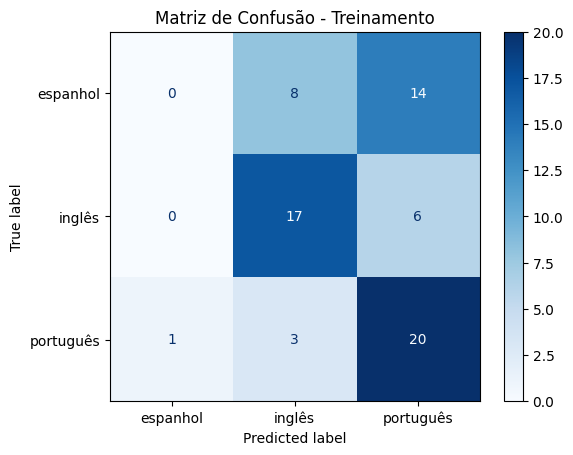


--- Relatório de Classificação (Dados de Treinamento) ---
              precision    recall  f1-score   support

    espanhol       0.00      0.00      0.00        22
      inglês       0.61      0.74      0.67        23
   português       0.50      0.83      0.62        24

    accuracy                           0.54        69
   macro avg       0.37      0.52      0.43        69
weighted avg       0.38      0.54      0.44        69


--- Métrica Dados de Teste) ---
Acurácia nos dados de teste: 52.17%

--- Matriz de Confusão (Dados de Teste) ---


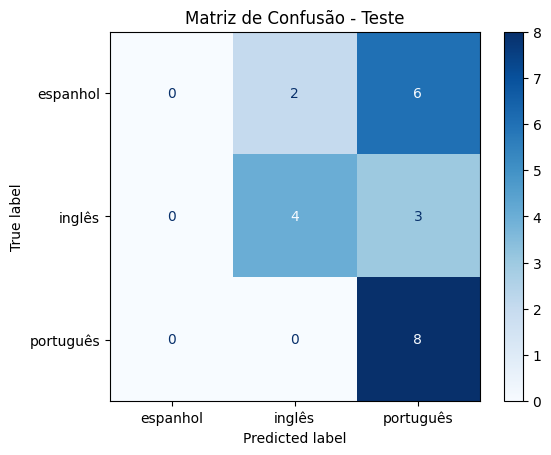


--- Relatório de Classificação (Dados de Teste) ---
              precision    recall  f1-score   support

    espanhol       0.00      0.00      0.00         8
      inglês       0.67      0.57      0.62         7
   português       0.47      1.00      0.64         8

    accuracy                           0.52        23
   macro avg       0.38      0.52      0.42        23
weighted avg       0.37      0.52      0.41        23



c:\Users\UFPR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\UFPR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\UFPR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [16]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Importar matplotlib

treinador = svm.SVC()  #algoritmo escolhido
modelo = treinador.fit(X_train, y_train)

#
# --- Acurácia e Matriz de Confusão para dados de TREINAMENTO ---
acuracia = modelo.score(X_train, y_train)
print("Acurácia nos dados de treinamento: {:.2f}%".format(acuracia * 100))

#
# melhor avaliar com a matriz de confusão
# y_pred = modelo.predict(X_train)
# cm = confusion_matrix(y_train, y_pred)
# Previsões nos dados de treinamento
y_pred_train = modelo.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)
labels = sorted(list(set(y_train))) # Garante a ordem correta das classes

# print(cm)
# print(classification_report(y_train, y_pred))

print("\n--- Matriz de Confusão (Dados de Treinamento) ---")
# Use ConfusionMatrixDisplay para exibir a matriz com legendas
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=labels)
disp_train.plot(cmap=plt.cm.Blues) # Você pode mudar o mapa de cores
plt.title('Matriz de Confusão - Treinamento')
plt.show() # Mostra o gráfico

print("\n--- Relatório de Classificação (Dados de Treinamento) ---")
print(classification_report(y_train, y_pred_train, target_names=labels)) # Usar target_names aqui também


# com dados de teste que não foram usados no treinamento
# print('métricas mais confiáveis')
# y_pred2 = modelo.predict(X_test)
# cm = confusion_matrix(y_test, y_pred2)
# print(cm)
# print(classification_report(y_test, y_pred2))


print('\n--- Métrica Dados de Teste) ---')

y_pred_test = modelo.predict(X_test)
# Acurácia nos dados de teste
acuracia_test = modelo.score(X_test, y_test)
print("Acurácia nos dados de teste: {:.2f}%".format(acuracia_test * 100))
# Matriz de confusão para os dados de teste
cm_test = confusion_matrix(y_test, y_pred_test)

print("\n--- Matriz de Confusão (Dados de Teste) ---")
# Use ConfusionMatrixDisplay para exibir a matriz com legendas
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=labels)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - Teste')
plt.show() # Mostra o gráfico

print("\n--- Relatório de Classificação (Dados de Teste) ---")
print(classification_report(y_test, y_pred_test, target_names=labels)) # Usar target_names aqui